##  厦门市
- 厦门市有6个市辖区，26个街道、12个镇， 361个社区、147个村。
- 思明区、湖里区、集美区、海沧区、同安区、翔安区
- 厦门市位于北纬24°23'～24°54'、东经117°53'～118°26'，在中国东南沿海，福建省南部，与漳州、泉州相连，地处闽南金三角中部。厦门市由厦门半岛、鼓浪屿及其众多小岛屿、岛礁和同安、集美、海沧、翔安、杏林湾、马銮湾、同安湾等组成，陆地面积1699.39平方千米，海域面积约390多平方千米。其中厦门岛面积约为157.76平方千米（含鼓浪屿），是福建省的第四大岛屿，全岛海岸线约为234千米。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import sparse
from datetime import datetime

巡游车订单数据

In [2]:
INPUT_PATH = r'D:\\数字中国创新大赛\\2020\\'

In [3]:
data = pd.concat([
    pd.read_csv(INPUT_PATH + 'taxiOrder20200618.csv'),
    pd.read_csv(INPUT_PATH + 'taxiOrder20200619.csv' ),
    pd.read_csv(INPUT_PATH + 'taxiOrder20200620.csv' ),
    pd.read_csv(INPUT_PATH + 'taxiOrder20200621.csv'),
    pd.read_csv(INPUT_PATH + 'taxiOrder20200622.csv'),
    pd.read_csv(INPUT_PATH + 'taxiOrder20200623.csv'),
    pd.read_csv(INPUT_PATH + 'taxiOrder20200624.csv'),
    pd.read_csv(INPUT_PATH + 'taxiOrder20200625.csv'),
    pd.read_csv(INPUT_PATH + 'taxiOrder20200626.csv'),
    pd.read_csv(INPUT_PATH + 'taxiOrder20200627.csv')
                                                
])

In [4]:
data.shape

(2060795, 10)

## 订单数据
- CAR_NO：车牌号
- GETON_DATE：上车时间
- GETON_LONGITUDE：上车经度（WGS84 GPS标准）、 GETON_LATITUDE：上车纬度（WGS84 GPS标准）、
- GETOFF_DATE：下车时间
- GETOFF_LONGITUDE：下车经度（WGS84 GPS标准）、 GETOFF_LATITUDE：下车纬度（WGS84 GPS标准）
- PASS_MILE：计程公里
- NOPASS_MILE：空驶公里
- WAITING_TIME：等待计时时间


In [5]:
data.head(10)

,CAR_NO,GETON_DATE,GETON_LONGITUDE,GETON_LATITUDE,GETOFF_DATE,GETOFF_LONGITUDE,GETOFF_LATITUDE,PASS_MILE,NOPASS_MILE,WAITING_TIME
0,0006d282be70d06881a7513b69fcaa60,2020/6/18 17:38,118.155098,24.506093,2020/6/18 17:51,118.135925,24.497720,2.6,10.8,498.0
1,0006d282be70d06881a7513b69fcaa60,2020/6/18 19:06,118.136500,24.517291,2020/6/18 19:11,118.139381,24.530025,2.3,0.3,54.0
2,0006d282be70d06881a7513b69fcaa60,2020/6/18 3:59,118.119495,24.479730,2020/6/18 4:06,118.116335,24.508518,3.9,0.2,83.0
3,0006d282be70d06881a7513b69fcaa60,2020/6/18 20:44,118.113631,24.478733,2020/6/18 20:53,118.140945,24.477328,3.0,3.8,250.0
4,0006d282be70d06881a7513b69fcaa60,2020/6/18 19:12,118.138891,24.530666,2020/6/18 19:19,118.144028,24.547116,3.3,0.1,73.0
5,0006d282be70d06881a7513b69fcaa60,2020/6/18 19:20,118.143230,24.546591,2020/6/18 19:46,118.119846,24.427598,20.9,0.1,100.0
6,0006d282be70d06881a7513b69fcaa60,2020/6/18 5:33,118.123750,24.495565,2020/6/18 5:34,118.125615,24.494621,0.2,0.0,24.0
7,0006d282be70d06881a7513b69fcaa60,2020/6/18 1:13,118.091305,24.483773,2020/6/18 1:21,118.112166,24.506658,4.2,9.2,119.0
8,0006d282be70d06881a7513b69fcaa60,2020/6/18 2:11,118.124645,24.509175,2020/6/18 2:28,118.174208,24.464051,9.9,2.8,190.0
9,0006d282be70d06881a7513b69fcaa60,2020/6/18 22:00,118.115401,24.510981,2020/6/18 22:29,118.047938,24.605175,17.4,1.5,455.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2060795 entries, 0 to 191477
Data columns (total 10 columns):
 #   Column            Dtype  
---  ------            -----  
 0   CAR_NO            object 
 1   GETON_DATE        object 
 2   GETON_LONGITUDE   float64
 3   GETON_LATITUDE    float64
 4   GETOFF_DATE       object 
 5   GETOFF_LONGITUDE  float64
 6   GETOFF_LATITUDE   float64
 7   PASS_MILE         float64
 8   NOPASS_MILE       float64
 9   WAITING_TIME      float64
dtypes: float64(7), object(3)
memory usage: 149.4+ MB


In [7]:
data.describe()

,GETON_LONGITUDE,GETON_LATITUDE,GETOFF_LONGITUDE,GETOFF_LATITUDE,PASS_MILE,NOPASS_MILE,WAITING_TIME
count,2.060795e+06,2.060795e+06,2.060795e+06,2.060795e+06,2.060795e+06,2.060795e+06,2.060795e+06
mean,1.150318e+02,2.385675e+01,1.164483e+02,2.415242e+01,5.944242e+00,3.958235e+00,2.483529e+02
std,1.884649e+01,3.910042e+00,1.395010e+01,2.895357e+00,5.634226e+00,6.861945e+00,8.525288e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.180963e+02,2.447402e+01,1.180959e+02,2.447473e+01,2.700000e+00,6.000000e-01,9.400000e+01
50%,1.181165e+02,2.448992e+01,1.181167e+02,2.449146e+01,4.500000e+00,2.000000e+00,1.760000e+02
75%,1.181395e+02,2.450981e+01,1.181421e+02,2.451205e+01,7.400000e+00,4.700000e+00,2.900000e+02
max,1.538398e+02,6.299373e+01,1.790345e+02,6.299373e+01,2.051200e+03,9.628000e+02,2.510390e+05


1、清除经纬度都是0的数据
2、计程公里平均为4，剔除大于100公里的数据
3、剔除等待计时时间大于24*60
4、剔除经纬度不属于24°23'～24°54'、东经117°53'～118°26这个范围的数据

In [8]:
23/60,54/60,53/60,26/60

(0.38333333333333336, 0.9, 0.8833333333333333, 0.43333333333333335)

In [9]:
# data.rename(columns={'CAR_NO':'','CAR_NO':'CARNO','CAR_NO':'CARNO',})

清除上车地点不在厦门市的数据，同时也保证了经纬度不为0

In [10]:
data_1 = data[['CAR_NO','GETON_DATE','GETON_LONGITUDE','GETON_LATITUDE','GETOFF_DATE','GETOFF_LONGITUDE','GETOFF_LATITUDE','PASS_MILE','NOPASS_MILE','WAITING_TIME']][(data['GETON_LATITUDE'].between(24.38,24.9,inclusive=True))&(data['GETON_LONGITUDE'].between(117.88,118.44,inclusive=True))]

取计程公里为(0,30)

In [11]:
data_2 = data_1[['CAR_NO','GETON_DATE','GETON_LONGITUDE','GETON_LATITUDE','GETOFF_DATE','GETOFF_LONGITUDE','GETOFF_LATITUDE','PASS_MILE','NOPASS_MILE','WAITING_TIME']][(data_1['PASS_MILE'].between(0.00000001,30,inclusive=True))]

In [12]:
data_2.describe()

,GETON_LONGITUDE,GETON_LATITUDE,GETOFF_LONGITUDE,GETOFF_LATITUDE,PASS_MILE,NOPASS_MILE,WAITING_TIME
count,1.993700e+06,1.993700e+06,1.993700e+06,1.993700e+06,1.993700e+06,1.993700e+06,1.993700e+06
mean,1.181189e+02,2.449649e+01,1.178224e+02,2.443662e+01,5.771717e+00,3.912054e+00,2.305088e+02
std,3.387839e-02,3.550434e-02,5.909477e+00,1.226837e+00,4.520720e+00,6.719960e+00,3.820537e+02
min,1.178816e+02,2.438026e+01,0.000000e+00,0.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00
25%,1.180990e+02,2.447537e+01,1.180973e+02,2.447546e+01,2.700000e+00,6.000000e-01,9.300000e+01
50%,1.181173e+02,2.449080e+01,1.181171e+02,2.449178e+01,4.500000e+00,2.000000e+00,1.750000e+02
75%,1.181406e+02,2.451035e+01,1.181424e+02,2.451207e+01,7.300000e+00,4.700000e+00,2.880000e+02
max,1.184345e+02,2.488789e+01,1.790345e+02,4.604790e+01,3.000000e+01,9.628000e+02,6.129500e+04


剔除等待计时时间大于24*60*60

In [13]:
data_3 = data_2[['CAR_NO','GETON_DATE','GETON_LONGITUDE','GETON_LATITUDE','GETOFF_DATE','GETOFF_LONGITUDE','GETOFF_LATITUDE','PASS_MILE','NOPASS_MILE','WAITING_TIME']][(data_2['WAITING_TIME']>0)&(data_2['WAITING_TIME']<24*60*60)]

In [14]:
#订单里程
data_3.loc[data_3['PASS_MILE'] >20 , 'PASS_MILE'] = data_3['PASS_MILE'].mean()

In [15]:
data_3.shape

(1949025, 10)

In [16]:
taxiorder = data_3

处理上车点时间数据

In [17]:
#处理时间特征
taxiorder['GETON_DATE'] = pd.to_datetime(taxiorder['GETON_DATE'],format='%Y-%m-%d %H:%M:%S')
taxiorder['GETOFF_DATE'] = pd.to_datetime(taxiorder['GETOFF_DATE'],format='%Y-%m-%d %H:%M:%S')
taxiorder["geton_hour"]=taxiorder['GETON_DATE'].dt.hour

taxiorder["geton_day"]=taxiorder["GETON_DATE"].dt.day

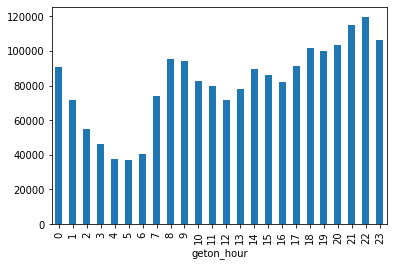

In [18]:
#计算订单数量随时间变化
taxiorder.groupby(['geton_hour'])['CAR_NO'].size().plot.bar()

In [19]:
taxiorder['GETOFF_DATE'].unique()

array(['2020-06-18T17:51:00.000000000', '2020-06-18T19:11:00.000000000',
       '2020-06-18T04:06:00.000000000', ...,
       '2020-06-28T00:45:00.000000000', '2020-06-28T00:26:00.000000000',
       '2020-06-28T00:30:00.000000000'], dtype='datetime64[ns]')

In [20]:
taxiorder["geton_weekday"]=taxiorder["GETON_DATE"].dt.weekday

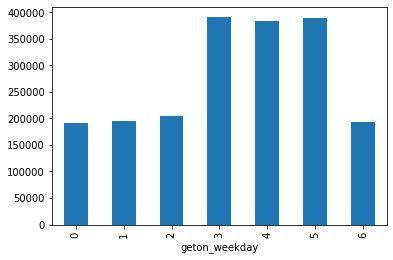

In [21]:
taxiorder.groupby(['geton_weekday'])['CAR_NO'].size().plot.bar()

25,26,27为节假日，20,21为非工作日，18,19,22,23,24

In [22]:
taxiorder.head()

,CAR_NO,GETON_DATE,GETON_LONGITUDE,GETON_LATITUDE,GETOFF_DATE,GETOFF_LONGITUDE,GETOFF_LATITUDE,PASS_MILE,NOPASS_MILE,WAITING_TIME,geton_hour,geton_day,geton_weekday
0,0006d282be70d06881a7513b69fcaa60,2020-06-18 17:38:00,118.155098,24.506093,2020-06-18 17:51:00,118.135925,24.497720,2.6,10.8,498.0,17,18,3
1,0006d282be70d06881a7513b69fcaa60,2020-06-18 19:06:00,118.136500,24.517291,2020-06-18 19:11:00,118.139381,24.530025,2.3,0.3,54.0,19,18,3
2,0006d282be70d06881a7513b69fcaa60,2020-06-18 03:59:00,118.119495,24.479730,2020-06-18 04:06:00,118.116335,24.508518,3.9,0.2,83.0,3,18,3
3,0006d282be70d06881a7513b69fcaa60,2020-06-18 20:44:00,118.113631,24.478733,2020-06-18 20:53:00,118.140945,24.477328,3.0,3.8,250.0,20,18,3
4,0006d282be70d06881a7513b69fcaa60,2020-06-18 19:12:00,118.138891,24.530666,2020-06-18 19:19:00,118.144028,24.547116,3.3,0.1,73.0,19,18,3


非工作日

In [23]:
taxiorder_nowork =  taxiorder[['CAR_NO','GETON_DATE','GETON_LONGITUDE','GETON_LATITUDE','GETOFF_DATE','GETOFF_LONGITUDE','GETOFF_LATITUDE','PASS_MILE','NOPASS_MILE','WAITING_TIME','geton_hour','geton_day']][(taxiorder['geton_day']==20) |(taxiorder['geton_day']==21)]

In [24]:
taxiorder_work =  taxiorder[['CAR_NO','GETON_DATE','GETON_LONGITUDE','GETON_LATITUDE','GETOFF_DATE','GETOFF_LONGITUDE','GETOFF_LATITUDE','PASS_MILE','NOPASS_MILE','geton_hour','geton_day']][(taxiorder['geton_day'] ==18)|(taxiorder['geton_day'] ==19) | (taxiorder['geton_day']>=22) &(taxiorder['geton_day']<=24)]

In [25]:
taxiorder_holiday =  taxiorder[['CAR_NO','GETON_DATE','GETON_LONGITUDE','GETON_LATITUDE','GETOFF_DATE','GETOFF_LONGITUDE','GETOFF_LATITUDE','PASS_MILE','NOPASS_MILE','geton_hour','geton_day']][(taxiorder['geton_day']>=25) &(taxiorder['geton_day']<=27)]

In [26]:
taxiorder_nowork['geton_day'].unique()
taxiorder_work['geton_day'].unique()
taxiorder_holiday['geton_day'].unique()

array([25, 26, 27], dtype=int64)

In [47]:
taxiorder_work['geton_day'].unique()

array([18, 19, 22, 23, 24], dtype=int64)

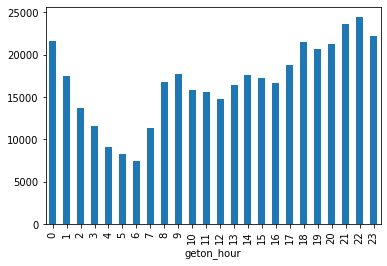

In [27]:
taxiorder_nowork.groupby(['geton_hour'])['CAR_NO'].size().plot.bar()

In [28]:
# col=[i  for i,x in enumerate(taxiorder.columns) if taxiorder['geton_day'] ]

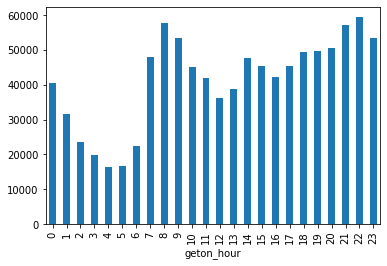

In [29]:
taxiorder_work.groupby(['geton_hour'])['CAR_NO'].size().plot.bar()

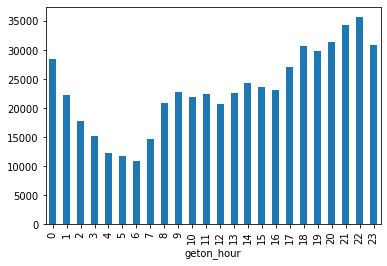

In [30]:
taxiorder_holiday.groupby(['geton_hour'])['CAR_NO'].size().plot.bar()

路网数据

In [31]:
import geohash2

In [32]:
# geohash2.encode(taxiorder['GETON_LONGITUDE'].values,taxiorder['GETON_LATITUDE'].values , precision=7)

In [33]:
import shapely, geopandas, fiona

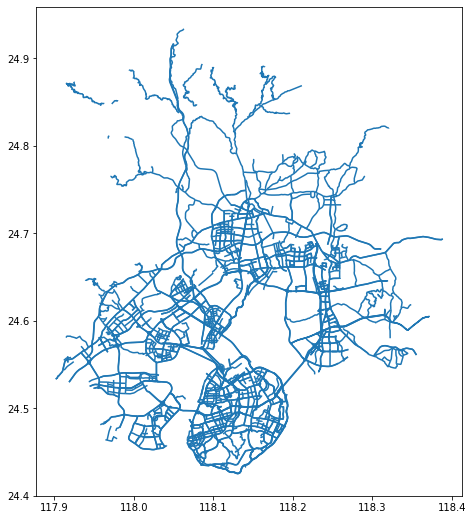

In [34]:

import seaborn as sns
shp_df = geopandas.GeoDataFrame.from_file("D://数字中国创新大赛/AI大赛路网修改版/xm_road_edit20200826.shp")
shp_df.plot(figsize=(15, 9))

热力图

In [35]:
import folium
from folium import plugins
from folium.plugins import HeatMap

In [36]:

map_hooray = folium.Map(location=[24.482426, 118.157606], zoom_start=14)

# Plot it on the map
HeatMap(taxiorder[['GETON_LONGITUDE','GETON_LATITUDE']].iloc[:2000]).add_to(map_hooray)

# Display the map
# map_hooray

平均运距

In [37]:
taxiorder_nowork.describe()

,GETON_LONGITUDE,GETON_LATITUDE,GETOFF_LONGITUDE,GETOFF_LATITUDE,PASS_MILE,NOPASS_MILE,WAITING_TIME,geton_hour,geton_day
count,401873.000000,401873.000000,401873.000000,401873.000000,401873.000000,401873.000000,401873.000000,401873.000000,401873.000000
mean,118.118961,24.495781,117.796735,24.430739,5.419852,3.859625,212.931118,12.787478,20.481120
std,0.033168,0.033964,6.160296,1.278381,3.716553,6.325066,349.627800,7.144051,0.499644
min,117.881966,24.382625,0.000000,0.000000,0.100000,0.000000,1.000000,0.000000,20.000000
25%,118.100307,24.476133,118.098203,24.475845,2.700000,0.600000,95.000000,7.000000,20.000000
50%,118.117571,24.490603,118.117318,24.491801,4.500000,2.000000,170.000000,14.000000,20.000000
75%,118.139938,24.509141,118.142057,24.511431,7.000000,4.700000,270.000000,19.000000,21.000000
max,118.432342,24.875721,125.334186,32.268376,20.000000,472.700000,61295.000000,23.000000,21.000000


In [38]:
taxiorder_nowork.columns

Index(['CAR_NO', 'GETON_DATE', 'GETON_LONGITUDE', 'GETON_LATITUDE',
       'GETOFF_DATE', 'GETOFF_LONGITUDE', 'GETOFF_LATITUDE', 'PASS_MILE',
       'NOPASS_MILE', 'WAITING_TIME', 'geton_hour', 'geton_day'],
      dtype='object')

In [39]:
 taxiorder_nowork

,CAR_NO,GETON_DATE,GETON_LONGITUDE,GETON_LATITUDE,GETOFF_DATE,GETOFF_LONGITUDE,GETOFF_LATITUDE,PASS_MILE,NOPASS_MILE,WAITING_TIME,geton_hour,geton_day
0,a29b3a05408b289c81cc0fa687ba98d6,2020-06-20 18:37:00,118.131100,24.501797,2020-06-20 18:48:00,118.155598,24.516960,4.1,1.6,240.0,18,20
1,7189ad5e4f057cb81e6ca8744858293f,2020-06-20 18:36:00,118.075556,24.468428,2020-06-20 18:47:00,118.078068,24.446641,3.9,0.1,246.0,18,20
2,aadab13d313bda70e827eb8b8598c646,2020-06-20 18:22:00,118.118250,24.486248,2020-06-20 18:46:00,118.155430,24.534463,9.4,0.0,687.0,18,20
3,c375b9bc472f9acd2005930462a810d9,2020-06-20 18:33:00,118.111411,24.496635,2020-06-20 18:52:00,118.169878,24.455883,14.8,2.2,60.0,18,20
4,25ebcc5245b6bc5cfc8c32c88e8b59c0,2020-06-20 18:31:00,118.141030,24.493493,2020-06-20 18:47:00,118.173393,24.471758,5.1,1.3,479.0,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...
204729,3dd6c92fe8a9c23a3625afc40aec9c01,2020-06-21 18:40:00,118.182158,24.511921,2020-06-21 18:55:00,118.148978,24.514823,5.1,2.3,389.0,18,21
204730,d27dac6938959bc4b2b8bc717867bd1d,2020-06-21 18:43:00,118.113298,24.498158,2020-06-21 18:54:00,118.112255,24.469460,4.4,1.9,241.0,18,21
204731,1a201525bb73110d5f918e1e6fe74e57,2020-06-21 17:27:00,118.072486,24.465770,2020-06-21 17:39:00,118.113028,24.479140,4.8,1.8,276.0,17,21
204732,15da7adeecf3e849abe535567d6f711f,2020-06-21 00:03:00,118.119483,24.479823,2020-06-21 00:09:00,118.116118,24.471160,1.4,0.1,140.0,0,21


In [40]:
passmile_mean = taxiorder_nowork['PASS_MILE'].groupby(taxiorder_nowork['geton_hour']).mean().sort_values( ascending=False)

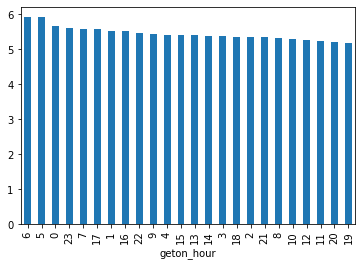

In [41]:
passmile_mean.plot.bar()

In [42]:
#  taxiorder_nowork.loc[taxiorder_nowork['PASS_MILE'] >20 , 'PASS_MILE'] = taxiorder_nowork['PASS_MILE'].mean()

In [43]:
taxiorder_nowork['PASS_MILE'].mean()

5.4198523910015295

In [44]:
taxiorder_nowork['PASS_MILE'].groupby(taxiorder_nowork['geton_day']).mean()

geton_day
20    5.411224
21    5.429158
Name: PASS_MILE, dtype: float64

In [45]:
taxiorder_work['PASS_MILE'].groupby(taxiorder_work['geton_day']).mean()

geton_day
18    5.453442
19    5.474192
22    5.429867
23    5.440212
24    5.528219
Name: PASS_MILE, dtype: float64

In [49]:
taxiorder_holiday['PASS_MILE'].groupby(taxiorder_holiday['geton_day']).mean()

geton_day
25    5.543281
26    5.469943
27    5.516699
Name: PASS_MILE, dtype: float64

订单平均运行时长

In [50]:
taxiorder_nowork.head()

,CAR_NO,GETON_DATE,GETON_LONGITUDE,GETON_LATITUDE,GETOFF_DATE,GETOFF_LONGITUDE,GETOFF_LATITUDE,PASS_MILE,NOPASS_MILE,WAITING_TIME,geton_hour,geton_day
0,a29b3a05408b289c81cc0fa687ba98d6,2020-06-20 18:37:00,118.131100,24.501797,2020-06-20 18:48:00,118.155598,24.516960,4.1,1.6,240.0,18,20
1,7189ad5e4f057cb81e6ca8744858293f,2020-06-20 18:36:00,118.075556,24.468428,2020-06-20 18:47:00,118.078068,24.446641,3.9,0.1,246.0,18,20
2,aadab13d313bda70e827eb8b8598c646,2020-06-20 18:22:00,118.118250,24.486248,2020-06-20 18:46:00,118.155430,24.534463,9.4,0.0,687.0,18,20
3,c375b9bc472f9acd2005930462a810d9,2020-06-20 18:33:00,118.111411,24.496635,2020-06-20 18:52:00,118.169878,24.455883,14.8,2.2,60.0,18,20
4,25ebcc5245b6bc5cfc8c32c88e8b59c0,2020-06-20 18:31:00,118.141030,24.493493,2020-06-20 18:47:00,118.173393,24.471758,5.1,1.3,479.0,18,20


In [51]:
taxiorder_nowork.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401873 entries, 0 to 204733
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   CAR_NO            401873 non-null  object        
 1   GETON_DATE        401873 non-null  datetime64[ns]
 2   GETON_LONGITUDE   401873 non-null  float64       
 3   GETON_LATITUDE    401873 non-null  float64       
 4   GETOFF_DATE       401873 non-null  datetime64[ns]
 5   GETOFF_LONGITUDE  401873 non-null  float64       
 6   GETOFF_LATITUDE   401873 non-null  float64       
 7   PASS_MILE         401873 non-null  float64       
 8   NOPASS_MILE       401873 non-null  float64       
 9   WAITING_TIME      401873 non-null  float64       
 10  geton_hour        401873 non-null  int64         
 11  geton_day         401873 non-null  int64         
dtypes: datetime64[ns](2), float64(7), int64(2), object(1)
memory usage: 46.3+ MB


In [52]:
# taxiorder['GETON_DATE'] = pd.to_datetime(taxiorder['GETON_DATE'],format='%Y-%m-%d %H:%M:%S')

非工作日

In [53]:
taxiorder_nowork['diff_seconds'] = (taxiorder_nowork['GETOFF_DATE'] - taxiorder_nowork['GETON_DATE']).map(lambda x : x.seconds)

In [54]:
taxiorder_nowork['diff_seconds'].groupby(taxiorder_nowork['geton_day']).mean()

geton_day
20    712.896933
21    696.085524
Name: diff_seconds, dtype: float64

In [55]:
712/60

11.866666666666667

工作日

In [56]:
taxiorder_work['diff_seconds'] = (taxiorder_work['GETOFF_DATE'] - taxiorder_work['GETON_DATE']).map(lambda x : x.seconds)

In [57]:
taxiorder_work['diff_seconds'].groupby(taxiorder_work['geton_day']).mean()

geton_day
18    748.784052
19    771.376411
22    752.023236
23    761.074979
24    852.611597
Name: diff_seconds, dtype: float64

In [58]:
taxiorder_holiday['diff_seconds'] = (taxiorder_holiday['GETOFF_DATE'] - taxiorder_holiday['GETON_DATE']).map(lambda x : x.seconds)

In [59]:
taxiorder_holiday['diff_seconds'].groupby(taxiorder_holiday['geton_day']).mean()

geton_day
25    694.578391
26    681.945805
27    698.620480
Name: diff_seconds, dtype: float64

In [60]:
852/60

14.2

NOPASS_MILE/(NOPASS_MILE+PASS_MILE)

In [61]:
#非工作日空驶率
taxiorder_nowork['NOPASS_MILE'].sum()/(taxiorder_nowork['NOPASS_MILE'].sum() + taxiorder_nowork['PASS_MILE'].sum())

0.41593129331420686

工作日空驶率

In [62]:
taxiorder_work['NOPASS_MILE'].sum()/(taxiorder_work['NOPASS_MILE'].sum() + taxiorder_work['PASS_MILE'].sum())

0.40110232104931526

节假日

In [63]:
taxiorder_holiday['NOPASS_MILE'].sum()/(taxiorder_holiday['NOPASS_MILE'].sum() + taxiorder_holiday['PASS_MILE'].sum())

0.4376612056290417